# Part1

# imports

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set_style('darkgrid')

In [ ]:
from pandas_datareader import DataReader
import pandas_datareader as dr
from datetime import datetime
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq
from math import sqrt

# Load_The_database

In [ ]:
import yfinance as yf
start_date=datetime(2020,10,30)
##check about the datetime
end_date=datetime(2021,6,1)
data = yf.download("^GSPC",start=start_date,end=end_date,group_by='Date')

# Part One - Exploring the S&P 500

In [ ]:
data

In [ ]:
print('==1==')
print('Q: מדוע קיבלנו רק 252 שורות אם בשנה יש 365 ימים?')
print('A: מפני שלא סוחרים כל יום, ויש ימים כמו שבת וראשון וחגים שבהם הבורסה בארהב סגורה.')
print('==2==')
print('Q: מה ההבדל בין Close לבין Adj Close')
print('A: adj close אלה שערי הסגירה המתאימים את הפעולות האחרונות ולאחר פערי מחירים ותנועות אחרונות ואפשר לקרוא להם שערי הסגירה המתואמים')
print('==3==')
print('Q:האם אתם רואים מגמה/הבדל כלשהו בין תחילת 2019 לסוף 2019?')
print('A: ניתן לראות מגמת עלייה של המדד בשנת 2019, נציג בקוד הבא:')


In [ ]:
plt.plot(data.index,data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LineChart of SPY - Adj Close')
plt.show()
data['Adj Close'].describe()

In [ ]:
#מגמת עליה של המדד בשנת 2019 

In [ ]:
plt.plot(data.index,data['Adj Close'],label = "Adj close")
plt.plot(data.index,data['Open'],label = "Open")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LineChart of SPY Adj close and Open')
plt.legend()
plt.show()

In [ ]:
plt.plot(data.index,data['Volume'])
plt.title('The Volume By Date')
plt.show()

In [ ]:
Mavg1 = 10
Mavg2 = 20
Mavg3 = 50
data['Mavg10'] = data['Adj Close'].rolling(window=Mavg1).mean()
data['Mavg20'] = data['Adj Close'].rolling(window=Mavg2).mean()
data['Mavg50'] = data['Adj Close'].rolling(window=Mavg3).mean()
data.head(50)

In [ ]:
print('==1==')
print('Q:מדוע ישנם ערכי NaN בטבלה החדשה?')
print('A: מפני שחישוב ממוצע נע מסתמך על ימים אחורה, כך שבשביל להציג תוצאה יש צורך באותם הנתונים - לכן התנון הראשון יהיה ביום ה 11 כי רק אז יש מספיק נתונים כדי לחשב ממוצע.')
print('==2==')
print('Q: מדוע הערכים בטבלה שונים בעמודות שהוספתם?')
print('A: מפני שכל ממוצע מחושב על מספר שונה של ימים')

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(data.index,data['Adj Close'],c='black', label = 'Adj Close')
plt.plot(data.index,data['Mavg10'], label = 'Mavg10')
plt.plot(data.index,data['Mavg20'], label = 'Mavg20')
plt.plot(data.index,data['Mavg50'], label = 'Mavg50')
plt.legend()
plt.show()

In [ ]:
print('==1==')
print('Q:מה ניתן להגיד מהגרף שיצא לכם?')
print('A: ככל שהממוצע הנע מחושב על מספר גדול יותר של ימים הוא מרוחק יותר מגרף המחירים והצורה שלו כללית יותר.')

In [ ]:
data['PerForDay'] = data['Adj Close'].pct_change()
data.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data['PerForDay'],linestyle='dashed',marker = 'o',markersize = 6,markerfacecolor='red')
plt.title('PerForDay')
plt.show()

In [ ]:
sns.distplot(data['PerForDay'].dropna(),bins=50,color='red')
plt.title('The Column PerForDay')
plt.show()

In [ ]:
print('==1==')
print('Q:מה ניתן להגיד על התנהגות המדד?')
print('A: המדד לרוב לא זז בקיצוניות בטווח היומי, התזוזות הן בין 0 ל 1% שינוי ברוב הפעמים.')
print('==2==')
print('Q:האם הגרף מתפלג נורמלית?')
print('A: נראה שכן')

In [ ]:
data = data.dropna()

# split the data

In [ ]:
xtrain = data.drop('PerForDay',axis=1).loc['2020-10-30':'2021-03-31']
ytrain = data['PerForDay'].loc['2020-10-30':'2021-03-31']
xtest = data.drop('PerForDay',axis=1).loc['2021-04-01':]
ytest = data['PerForDay'].loc['2021-04-01':]

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

In [ ]:
xtrain

In [ ]:
ytrain

In [ ]:
xtest

In [ ]:
ytest

# DecisionTreeRegressor

In [ ]:
#DecisionTreeRegressor or DecisionTreeRegresson

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(xtrain,ytrain)
pred = regressor.predict(xtest)
score = r2_score(ytest,pred)
print("r^2 score is ",score)

In [ ]:
##R2 מתאר את הקשר בין הפרדיקציה למציאות. היינו רוצים לראות R2 חיובי וקרוב יותר ל1. לדעתנו המודל לא ניבא טוב את המציאות ולכן המודל לא טוב ולא היינו נשארים עם התוצאה הזאת.

In [ ]:
print('==1==')
print('Q:מה משמעות הערך R2?')
print('A: R2 מתאר את הקשר בין הפרדיקציה למציאות')
print('==2==')
print('Q:האם הערך שיצא לכם הוא טוב או לא?')
print('A: לדעתנו לא טוב')
print('==3==')
print('Q:האם המודל טוב או לא?')
print('A: לדעתנו לא טוב')
print('==4==')
print('Q:הייתם נשארים עם תוצאות המודל הנ"ל או בוחרים לנסות מודל אחר?')
print('A: היינו רוצים לראות R2 חיובי וקרוב לאחד, ולכן היינו בוחרים לנסות מודל אחר')

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randreg = RandomForestRegressor(oob_score=True,random_state=0)
randreg.fit(xtrain,ytrain)
score_forest = r2_score(ytest,randreg.predict(xtest))
randreg.oob_score_

In [ ]:
score_forest

In [31]:
##הגענו לאחוז מוסבר יותר גבוה אך עדיין לא מספק

# Part2

In [32]:
#sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
#data_table = pd.read_html(sp500_url)[0]['Symbol']
#tickers = data_table.to_list()
#prices_list = []

In [33]:
#for ticker in tickers:
 #   try:
  #      prices = dr.DataReader(ticker,'yahoo',start_date,end_date)['Adj Close']
   #     prices = pd.DataFrame(prices)
    #    prices.columns = [ticker]
     #   prices_list.append(prices)
    #except:
     #   pass
    #prices_df = pd.concat(prices_list,axis=1)
    
#prices_df.sort_index(inplace=True)

In [34]:
'''
עבור כל סימבול מתוך הרשימה
תנסה
להוציא רשימה של שערי סגירה מתואמים בין תאריך ההתחלה לתאריך הסיום
להכניס לדאטאפריים
להוסיף כותרת לפי שם המניה
'''

'\nעבור כל סימבול מתוך הרשימה\nתנסה\nלהוציא רשימה של שערי סגירה מתואמים בין תאריך ההתחלה לתאריך הסיום\nלהכניס לדאטאפריים\nלהוסיף כותרת לפי שם המניה\n'

In [35]:
prices_df = pd.read_csv('prices_df_2019.csv')
prices_df = prices_df.set_index('Date')
prices_df.head()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2019,67.791504,80.913643,309.959992,137.682632,46.350380,224.570007,18.830000,156.955002,13.495584,43.989311,...,100.250526,46.331181,19.286905,84.908691,65.213387,89.070412,156.240005,101.280602,39.697353,83.688446
03/01/2019,64.592140,78.247650,302.290008,132.981903,44.704514,215.699997,17.049999,161.854889,13.486069,42.877983,...,99.280663,46.148624,18.865334,81.711800,62.977840,86.829994,146.880005,99.448669,39.477768,80.795799
04/01/2019,66.435669,80.768547,313.440002,138.152725,46.488358,226.190002,19.000000,157.839539,13.933384,43.409485,...,103.284927,46.600212,19.593504,85.495285,65.634995,89.089882,152.970001,102.845154,40.690266,83.965828
07/01/2019,67.430595,81.947380,314.799988,138.632599,47.799141,229.259994,20.570000,160.155304,14.000006,43.641418,...,105.119019,46.398445,20.015074,87.753654,64.664299,88.992477,155.289993,102.884758,40.852573,84.471039
08/01/2019,66.621002,82.328247,318.420013,142.138565,49.247898,232.679993,20.750000,159.042175,14.323593,43.776711,...,108.412689,46.936501,20.676178,86.081886,65.272209,88.817146,156.330002,100.577530,41.224911,85.729149


In [36]:
Returns = pd.DataFrame(prices_df.pct_change().mean()*252,columns=['Returns'])
Returns['Volatility'] = prices_df.pct_change().std()*sqrt (252)
data = np.asarray([np.asarray(Returns['Returns']),np.asarray(Returns['Volatility'])]).T

In [37]:
Returns.head()

,Returns,Volatility
ABT,0.259491,0.194902
ABBV,0.100436,0.271236
ABMD,-0.462331,0.503473
ACN,0.432713,0.168881
ATVI,0.306473,0.354688


In [38]:
print('==1==')
print('Q:מה המשמעות של הפקודה T בסוף הפקודה?')
print('A: היפוך של המערך במשתנה data')

==1==
Q:מה המשמעות של הפקודה T בסוף הפקודה?
A: היפוך של המערך במשתנה data


In [39]:
from sklearn.cluster import KMeans
distortions = []
NumOfClusterer = []
for i in range(2,21):
    NumOfClusterer.append(i)
    clusterer = KMeans(n_clusters=i,random_state=204440705)
    distortions.append(clusterer.fit(data).inertia_)

In [40]:
NumOfClusterer

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

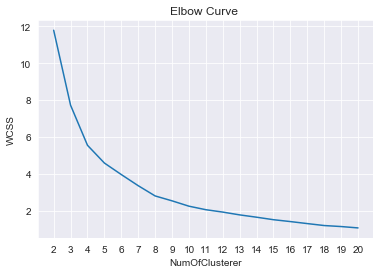

In [41]:
plt.plot(NumOfClusterer,distortions)
plt.xticks(NumOfClusterer)
plt.ylabel('WCSS')
plt.xlabel('NumOfClusterer')
plt.title('Elbow Curve ')
plt.show()

In [42]:
print('==1==')
print('Q:מה מספר הקלאסטרים הטוב ביותר שמצאתם?')
print('A:5')

==1==
Q:מה מספר הקלאסטרים הטוב ביותר שמצאתם?
A:5


In [43]:
##cluster 5
NumOfBestClusters = 5
centroids,_ = kmeans(data,NumOfBestClusters)
idx,_ = vq(data,centroids)

In [44]:
print('==1==')
print('Q:מה חישבתם ב-2 פיסות הקוד הנ"ל?')
print('A:את המרכזים של כל קלאסטר')

==1==
Q:מה חישבתם ב-2 פיסות הקוד הנ"ל?
A:את המרכזים של כל קלאסטר


In [45]:
idx 
#מספר הקלאסטר של כל שורה
#centroids המרכזים של כל קלאסטר

array([1, 0, 3, 4, 1, 4, 2, 0, 4, 0, 1, 4, 4, 0, 3, 4, 0, 4, 4, 3, 1, 1,
       1, 1, 0, 0, 0, 1, 3, 1, 1, 1, 4, 1, 4, 0, 4, 1, 1, 4, 2, 0, 4, 0,
       3, 1, 2, 2, 4, 0, 3, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 4, 4, 0, 1, 1,
       2, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 4, 4, 1, 0, 4, 0, 0, 1, 4,
       2, 1, 0, 0, 3, 1, 0, 0, 4, 0, 2, 1, 0, 0, 1, 4, 0, 4, 1, 0, 0, 0,
       1, 0, 3, 0, 1, 0, 2, 3, 0, 1, 0, 1, 2, 3, 0, 1, 2, 1, 0, 1, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 2, 3, 0, 4, 1, 1, 4, 4, 0, 0, 0, 4, 0, 1, 0,
       1, 3, 3, 0, 0, 2, 1, 1, 1, 4, 4, 1, 1, 3, 4, 4, 1, 1, 4, 0, 1, 1,
       0, 3, 0, 1, 0, 3, 4, 4, 0, 3, 1, 1, 1, 1, 4, 4, 0, 1, 4, 1, 4, 0,
       4, 3, 3, 3, 4, 3, 4, 0, 0, 4, 1, 0, 0, 0, 1, 2, 1, 1, 3, 3, 0, 0,
       1, 4, 0, 1, 0, 1, 4, 0, 4, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 4,
       4, 4, 0, 4, 2, 1, 1, 0, 0, 0, 3, 1, 1, 0, 4, 1, 0, 0, 4, 1, 0, 0,
       1, 1, 3, 4, 1, 4, 2, 1, 4, 1, 2, 3, 3, 0, 3, 4, 1, 2, 0, 1, 4, 2,
       4, 0, 0, 1, 4, 4, 4, 0, 1, 4, 0, 3, 0, 2, 4,

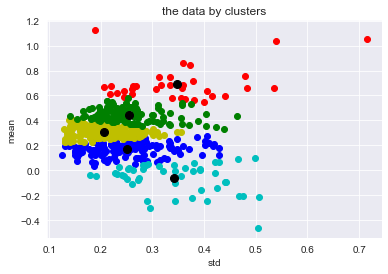

In [46]:
color = ['b','y','r','c','g']
for i in range(NumOfBestClusters):
    plot(data[idx==i,1],data[idx==i,0],'ro',c=color[i])
    plot(centroids[i][1],centroids[i][0],'ro',c='k',markersize=8)
plt.title('the data by clusters')
plt.xlabel('std')
plt.ylabel('mean')
plt.show()

In [47]:
print('==1==')
print('Q:האם ישנם outliers להערכתם?')
print('A:להערכתנו יש אווטליירים, ניתן לראות על הגרף את הנקודות הרחוקות מכל קלאס')

==1==
Q:האם ישנם outliers להערכתם?
A:להערכתנו יש אווטליירים, ניתן לראות על הגרף את הנקודות הרחוקות מכל קלאס


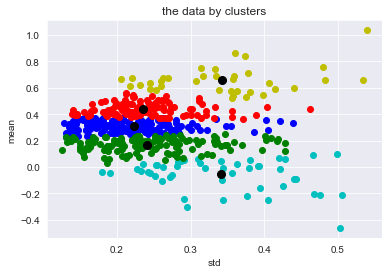

In [48]:
outliers = Returns.idxmax(axis=0)
Returns = Returns.drop(index=outliers)
data = np.asarray([np.asarray(Returns['Returns']),np.asarray(Returns['Volatility'])]).T
NumOfBestClusters = 5
centroids,_ = kmeans(data,NumOfBestClusters)
idx,_ = vq(data,centroids)
for i in range(NumOfBestClusters):
    plot(data[idx==i,1],data[idx==i,0],'ro',c=color[i])
    plot(centroids[i][1],centroids[i][0],'ro',c='k',markersize=8)
plt.title('the data by clusters')
plt.xlabel('std')
plt.ylabel('mean')
plt.show()


In [49]:
outliers[0:]

Returns       HWM
Volatility    ETN
dtype: object

In [50]:
print('==1==')
print('Q:מה ניתן להגיד על המניות מבחינת החזר ותנודתיות?')
print('Q:מה ניתן להגיד על הקבוצות שיצאו לכם?')
print('A:המניות חולקו לחמישה קבוצות עפי ממוצע וסטיות תקן, ניתן לראות כי מניות שמתאפיינות בממוצע שקרוב לאפס מתאפיינות גם בסטיית תקן נמוכה מאוד')
print('A:מנגד ניתן לראות שמניות עם סטיית תקן גבוה נמצאות בנקודות קצה, מרוויחות הרבה או מפסידות הרבה')

==1==
Q:מה ניתן להגיד על המניות מבחינת החזר ותנודתיות?
Q:מה ניתן להגיד על הקבוצות שיצאו לכם?
A:המניות חולקו לחמישה קבוצות עפי ממוצע וסטיות תקן, ניתן לראות כי מניות שמתאפיינות בממוצע שקרוב לאפס מתאפיינות גם בסטיית תקן נמוכה מאוד
A:מנגד ניתן לראות שמניות עם סטיית תקן גבוה נמצאות בנקודות קצה, מרוויחות הרבה או מפסידות הרבה


In [51]:
details = [(name,cluster) for name, cluster in zip(Returns.index,idx)]
labels =['Stock Symbol', 'Cluster']
dfPart2 = pd.DataFrame.from_records(details, columns=labels)

In [52]:
dfPart2

,Stock Symbol,Cluster
0,ABT,0
1,ABBV,4
2,ABMD,3
3,ACN,2
4,ATVI,0
...,...,...
493,YUM,4
494,ZBRA,1
495,ZBH,2
496,ZION,0


In [53]:
p2c1 = dfPart2['Stock Symbol'][dfPart2['Cluster']==0]
p2c2 = dfPart2['Stock Symbol'][dfPart2['Cluster']==1]
p2c3 = dfPart2['Stock Symbol'][dfPart2['Cluster']==2]
p2c4 = dfPart2['Stock Symbol'][dfPart2['Cluster']==3]
p2c5 = dfPart2['Stock Symbol'][dfPart2['Cluster']==4]

In [54]:
for i in range(NumOfBestClusters):
    name = 'Cluster'+str(i+1)
    print(name)
    for j in (dfPart2['Stock Symbol'][dfPart2['Cluster']==i][:10]):
        print(j)
    print()

Cluster1
ABT
ATVI
A
LNT
ALL
GOOGL
GOOG
AEP
AXP
AIG

Cluster2
AMD
ANSS
AAPL
AMAT
BBY
CDW
CMG
CAG
CPRT
COTY

Cluster3
ACN
ADBE
AES
APD
AKAM
ARE
ALGN
ALLE
AMT
AMP

Cluster4
ABMD
ALB
ADS
AAL
APA
ANET
BIIB
CHRW
COG
CTL

Cluster5
ABBV
AAP
AFL
ALK
ALXN
MO
AMZN
AMCR
AEE
ABC



# Part 3

In [55]:
data = pd.read_csv('prices_df_2019.csv')
data = data.set_index('Date')
data = data.pct_change()


In [56]:
data.head()

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
02/01/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03/01/2019,-0.047194,-0.032949,-0.024745,-0.034142,-0.035509,-0.039498,-0.094530,0.031218,-0.000705,-0.025264,...,-0.009674,-0.003940,-0.021858,-0.037651,-0.034280,-0.025153,-0.059908,-0.018088,-0.005531,-0.034564
04/01/2019,0.028541,0.032217,0.036885,0.038884,0.039903,0.048632,0.114370,-0.024808,0.033169,0.012396,...,0.040333,0.009786,0.038598,0.046303,0.042192,0.026027,0.041462,0.034153,0.030713,0.039235
07/01/2019,0.014976,0.014595,0.004339,0.003474,0.028196,0.013573,0.082632,0.014672,0.004781,0.005343,...,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.015166,0.000385,0.003989,0.006017
08/01/2019,-0.012006,0.004648,0.011499,0.025290,0.030309,0.014918,0.008751,-0.006950,0.023113,0.003100,...,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,0.006697,-0.022425,0.009114,0.014894


In [57]:
print('==1==')
print('Q:ניתן לראות שהשורה הראשונה של תאריך 02/01/2019 מלאה ב-NaN. מדוע זאת?')
print('Q:השורה הראשומה מלאה בנאן מכיוון שבתאריך שלפני אין נתונים')

==1==
Q:ניתן לראות שהשורה הראשונה של תאריך 02/01/2019 מלאה ב-NaN. מדוע זאת?
Q:השורה הראשומה מלאה בנאן מכיוון שבתאריך שלפני אין נתונים


In [58]:
data = data[1:]
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
03/01/2019,-0.047194,-0.032949,-0.024745,-0.034142,-0.035509,-0.039498,-0.094530,0.031218,-0.000705,-0.025264,...,-0.009674,-0.003940,-0.021858,-0.037651,-0.034280,-0.025153,-0.059908,-0.018088,-0.005531,-0.034564
04/01/2019,0.028541,0.032217,0.036885,0.038884,0.039903,0.048632,0.114370,-0.024808,0.033169,0.012396,...,0.040333,0.009786,0.038598,0.046303,0.042192,0.026027,0.041462,0.034153,0.030713,0.039235
07/01/2019,0.014976,0.014595,0.004339,0.003474,0.028196,0.013573,0.082632,0.014672,0.004781,0.005343,...,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.015166,0.000385,0.003989,0.006017
08/01/2019,-0.012006,0.004648,0.011499,0.025290,0.030309,0.014918,0.008751,-0.006950,0.023113,0.003100,...,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,0.006697,-0.022425,0.009114,0.014894
09/01/2019,0.016691,-0.032823,0.056466,0.005030,0.017210,0.011819,-0.026988,0.027559,-0.001993,-0.002208,...,0.013020,-0.007984,0.014365,0.008972,0.016224,-0.000439,0.024819,0.008172,0.008569,-0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2019,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.002098,0.023757,0.003751,-0.003027,0.004187,...,-0.005634,0.003913,0.000536,-0.004146,-0.003927,0.005210,-0.009348,-0.002447,0.003701,0.004155
26/12/2019,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.004732,0.001934,-0.008096,0.008603,-0.002654,...,0.010757,-0.001114,0.002944,0.001929,-0.000509,0.014552,0.000354,-0.002191,0.002523,0.000827
27/12/2019,0.001375,-0.007013,-0.010175,0.000802,0.005094,-0.001238,-0.009650,-0.005776,0.002509,0.000000,...,-0.008018,0.005256,-0.004536,-0.002635,0.003053,0.001081,0.006210,-0.001930,-0.003097,0.001654


(251, 500)

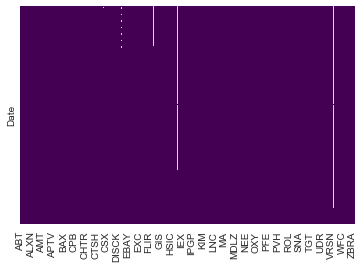

In [59]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.shape

(251, 493)

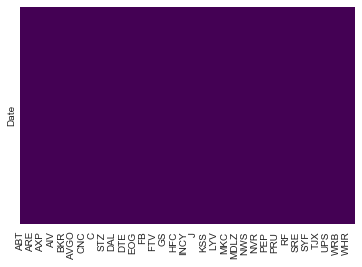

In [60]:
data = data.dropna(axis='columns')
#check if good
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data.shape

In [61]:
namestock = data.columns

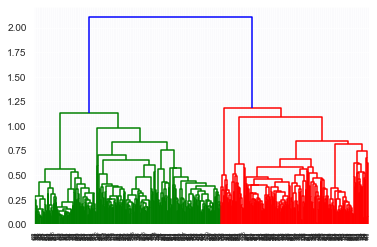

In [62]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data.T,method='ward'))

In [63]:
print('==1==')
print('Q:הסבירו מהי שיטת ward.')
print('A: ')
print('==2==')
print('Q:•	הסבירו כיצד דנדוגרמה מבצעת את החלוקה לקלאסטרינג')
print('A: ')

==1==
Q:הסבירו מהי שיטת ward.
A: 
==2==
Q:•	הסבירו כיצד דנדוגרמה מבצעת את החלוקה לקלאסטרינג
A: 


In [64]:
#5 clusterer
NumOfBestCluster = 3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =NumOfBestCluster , affinity = 'euclidean', linkage = 'ward')
centroids,_ = kmeans(data.T,NumOfBestCluster)
idx,_ = vq(data.T,centroids)
details = [(name,cluster) for name, cluster in zip(Returns.index,idx)]
labels =['Stock Symbol', 'Cluster']
dfPart3 = pd.DataFrame.from_records(details, columns=labels)

In [65]:
dfPart3

,Stock Symbol,Cluster
0,ABT,2
1,ABBV,2
2,ABMD,1
3,ACN,2
4,ATVI,2
...,...,...
488,WYNN,0
489,XEL,1
490,XRX,2
491,XLNX,1


In [66]:
p3c1 = dfPart3['Stock Symbol'][dfPart3['Cluster']==0]
p3c2 = dfPart3['Stock Symbol'][dfPart3['Cluster']==1]
p3c3 = dfPart3['Stock Symbol'][dfPart3['Cluster']==2]

In [67]:
print('==1==')
print('Q:כתבו לכל קלאס 10 מניות שקוטלגו כדומות אחת לשנייה.')
print('A: ')
for i in range(NumOfBestCluster):
    print('Cluster',i+1)
    for j in (dfPart3['Stock Symbol'][dfPart3['Cluster']==i][:10]):
        print(j)
print()

==1==
Q:כתבו לכל קלאס 10 מניות שקוטלגו כדומות אחת לשנייה.
A: 
Cluster 1
AES
ARE
LNT
MO
AEE
AEP
AMT
AWK
AIV
ATO
Cluster 2
ABMD
AMD
ALB
ADS
AAL
AMP
ADI
AOS
APA
AMAT
Cluster 3
ABT
ABBV
ACN
ATVI
ADBE
AAP
AFL
A
APD
AKAM



In [68]:
print('==1==')
print('Q:מצאו 2-3 זוגות מניות שסווגו כזהות בבדיקה הראשונה ושונות בבדיקה השנייה.')
print('A: ')
clasp2=[]
clasp3=[]
for i in range (0,len(p2c1.to_list())-1):
        a = p2c1.to_list()[i]+'-'+p2c1.to_list()[i+1]
        clasp2.append(a)

for i in range(0,len(p3c1.to_list())-1):
    for j in range(0,len(p3c2.to_list())-1):
        a = p3c1.to_list()[i]+'-'+p3c2.to_list()[j]
        clasp3.append(a)

for i in clasp2:
    if i in clasp3:
        print(i)

==1==
Q:מצאו 2-3 זוגות מניות שסווגו כזהות בבדיקה הראשונה ושונות בבדיקה השנייה.
A: 
AVB-BKR
CBOE-CE
CINF-CFG
RE-EXR
HCA-PEAK
K-KMB
KMI-LH
MXIM-MCK
PFG-PG
PGR-PWR


In [69]:
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
03/01/2019,-0.047194,-0.032949,-0.024745,-0.034142,-0.035509,-0.039498,-0.094530,0.031218,-0.000705,-0.025264,...,-0.009674,-0.003940,-0.021858,-0.037651,-0.034280,-0.025153,-0.059908,-0.018088,-0.005531,-0.034564
04/01/2019,0.028541,0.032217,0.036885,0.038884,0.039903,0.048632,0.114370,-0.024808,0.033169,0.012396,...,0.040333,0.009786,0.038598,0.046303,0.042192,0.026027,0.041462,0.034153,0.030713,0.039235
07/01/2019,0.014976,0.014595,0.004339,0.003474,0.028196,0.013573,0.082632,0.014672,0.004781,0.005343,...,0.017758,-0.004330,0.021516,0.026415,-0.014789,-0.001093,0.015166,0.000385,0.003989,0.006017
08/01/2019,-0.012006,0.004648,0.011499,0.025290,0.030309,0.014918,0.008751,-0.006950,0.023113,0.003100,...,0.031333,0.011596,0.033030,-0.019051,0.009401,-0.001970,0.006697,-0.022425,0.009114,0.014894
09/01/2019,0.016691,-0.032823,0.056466,0.005030,0.017210,0.011819,-0.026988,0.027559,-0.001993,-0.002208,...,0.013020,-0.007984,0.014365,0.008972,0.016224,-0.000439,0.024819,0.008172,0.008569,-0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/12/2019,-0.000801,-0.004432,0.010913,0.003700,-0.001358,0.002098,0.023757,0.003751,-0.003027,0.004187,...,-0.005634,0.003913,0.000536,-0.004146,-0.003927,0.005210,-0.009348,-0.002447,0.003701,0.004155
26/12/2019,0.000000,-0.000223,-0.007487,0.002079,0.001360,0.004732,0.001934,-0.008096,0.008603,-0.002654,...,0.010757,-0.001114,0.002944,0.001929,-0.000509,0.014552,0.000354,-0.002191,0.002523,0.000827
27/12/2019,0.001375,-0.007013,-0.010175,0.000802,0.005094,-0.001238,-0.009650,-0.005776,0.002509,0.000000,...,-0.008018,0.005256,-0.004536,-0.002635,0.003053,0.001081,0.006210,-0.001930,-0.003097,0.001654


In [70]:
##להוסיף pca ולהוריד כמות מימדים ל2 
##להדפיס גרף נקודות דו מימדי
##הסבר על סיווג המניות
#import visuals as vs
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data) 
reduced_data1 = pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2'])
reduced_data1.head()

,Dimension 1,Dimension 2
0,-0.515944,0.161203
1,0.749055,-0.140935
2,0.249184,-0.002840
3,0.183631,-0.074935
4,0.187599,0.047704


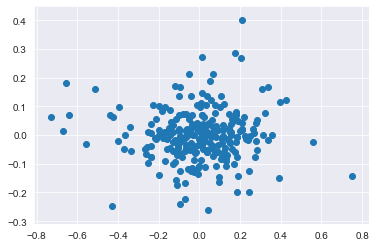

In [71]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],cmap='coolwarm')

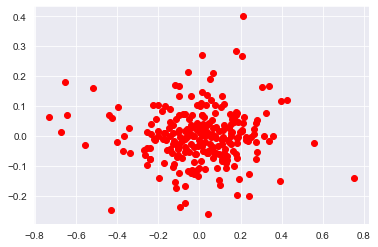

In [72]:
plot(reduced_data1['Dimension 1'],reduced_data1['Dimension 2'],'ro')

In [73]:
##להוריד את כמות המימדים ל3 ולהדפיס גרף תלת מימד
#import visuals as vs
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(data)
reduced_data = pca.transform(data) 
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_data.head()

,Dimension 1,Dimension 2,Dimension 3
0,-0.515944,0.161203,-0.179946
1,0.749055,-0.140935,-0.014517
2,0.249184,-0.002840,0.026274
3,0.183631,-0.074935,-0.099492
4,0.187599,0.047704,0.087152


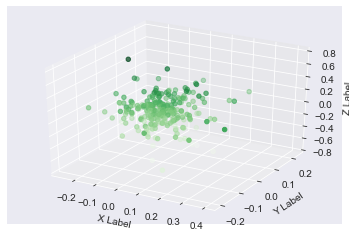

In [74]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = reduced_data['Dimension 1']
xdata = reduced_data['Dimension 2']
ydata = reduced_data['Dimension 3']
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# part4

In [75]:
data20 = pd.read_csv('Prices_df_2020.csv').set_index('Date')
data20 = data20.pct_change()
data20 = data20.dropna()
data20 = data20.T
data20.head()

Date,2020-03-20,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-30,2020-03-31,2020-04-01,2020-04-02,...,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-06-01
ABT,-0.087248,-0.076176,0.109360,0.015210,0.071519,-0.016489,0.064109,-0.005420,-0.029654,0.037482,...,0.004227,-0.022710,0.021197,0.003330,0.011948,-0.021756,0.014305,0.014764,0.030619,-0.020122
ABBV,-0.031523,-0.062772,0.046356,0.006223,0.087174,-0.015712,0.035365,0.012626,-0.036357,0.023291,...,0.008378,-0.002952,-0.000110,0.020068,-0.009890,-0.015092,-0.008048,0.000556,0.029324,-0.021258
ABMD,-0.071169,0.014022,0.085613,0.022412,0.015522,-0.026346,0.025819,-0.025706,-0.004685,-0.008306,...,0.033149,-0.001361,0.029194,-0.000204,0.050122,0.014164,-0.006313,0.046207,0.030088,0.010004
ACN,-0.054006,-0.041683,0.091586,-0.032069,0.128573,-0.049375,0.042608,-0.038629,-0.052554,0.010279,...,0.048238,-0.013800,0.026777,-0.008607,0.001085,0.013887,0.017974,0.008703,-0.000248,0.008729
ATVI,-0.038426,0.084918,-0.036125,-0.028661,0.091734,-0.013167,0.026510,0.017274,-0.033289,0.057043,...,-0.014069,0.002058,0.010270,-0.017755,0.008417,-0.042146,0.002143,0.000998,0.025064,0.014032


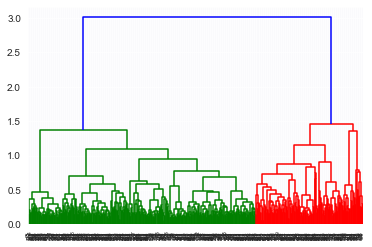

In [76]:
dendrogram = sch.dendrogram(sch.linkage(data20,method='ward'))

In [77]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
centroids,_ = kmeans(data20,2)
idx,_ = vq(data20,centroids)
details = [(name,cluster) for name, cluster in zip(data20.index,idx)]
labels =['Stock Symbol', 'Cluster']
dfPart4 = pd.DataFrame.from_records(details, columns=labels)
dfPart4

,Stock Symbol,Cluster
0,ABT,1
1,ABBV,1
2,ABMD,1
3,ACN,1
4,ATVI,1
...,...,...
497,YUM,1
498,ZBRA,1
499,ZBH,0
500,ZION,0


In [78]:
p4c1 = dfPart4['Stock Symbol'][dfPart4['Cluster']==0]
p4c2 = dfPart4['Stock Symbol'][dfPart4['Cluster']==1]
p4c3 = dfPart4['Stock Symbol'][dfPart4['Cluster']==2]

In [79]:
pca = PCA(n_components=2).fit(data20)
reduced_data = pca.transform(data20) 
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2'])
reduced_data.head()

,Dimension 1,Dimension 2
0,-0.155426,-0.039508
1,-0.157250,0.011685
2,-0.109873,0.040801
3,-0.053575,-0.003791
4,-0.255366,0.123408


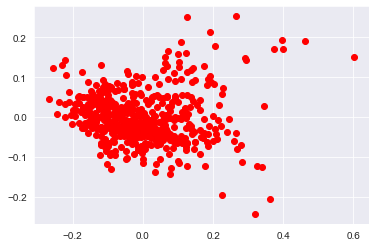

In [80]:
plot(reduced_data['Dimension 1'],reduced_data['Dimension 2'],'ro')

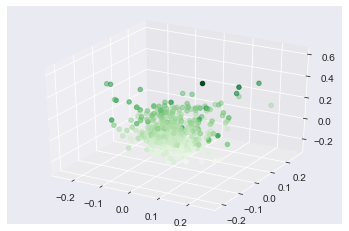

In [81]:
pca = PCA(n_components=3).fit(data20)
reduced_data = pca.transform(data20) 
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2','Dimension 3'])
reduced_data.head()
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = reduced_data['Dimension 1']
xdata = reduced_data['Dimension 2']
ydata = reduced_data['Dimension 3']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [82]:
print('==1==')
print('Q:מצאו 2-3 זוגות מניות שסווגו כזהות בבדיקה הראשונה ושונות בבדיקה השנייה.')
print('A: ')
clasp2=[]
clasp3=[]
for i in range (0,len(p3c1.to_list())-1):
        a = p3c1.to_list()[i]+'-'+p3c1.to_list()[i+1]
        clasp2.append(a)

for i in range(0,len(p4c1.to_list())-1):
    for j in range(0,len(p4c2.to_list())-1):
        a = p4c1.to_list()[i]+'-'+p4c2.to_list()[j]
        clasp3.append(a)

for i in clasp2:
    if i in clasp3:
        print(i)

==1==
Q:מצאו 2-3 זוגות מניות שסווגו כזהות בבדיקה הראשונה ושונות בבדיקה השנייה.
A: 
AES-ARE
AIV-ATO
BXP-CPB
CNP-CMG
COTY-CVS
FANG-DLTR
DTE-ECL
EMR-EFX
FITB-IT
HCA-HOLX
IVZ-JKHY
JPM-K
KMI-KHC
MTB-MKTX
MA-MXIM
MCHP-MSFT
JWN-NOC
PFG-PGR
SLB-SRE
TDG-TRV
VLO-VAR


# part5

In [83]:
year19start = datetime(2019,1,1)
year19end = datetime(2019,12,30)
part5start_date = datetime(2019,5,1)
part5end_date = datetime(2020,2,11)
part5pred_sd = datetime(2020,2,11)
part5pred_ed = datetime(2020,5,29)

In [84]:
tickers = ['AMZN','AAPL','GOOG']

In [85]:
prices_list = []
for ticker in tickers:
    print(ticker)
    prices = yf.download(ticker,year19start,year19end)['Adj Close']    
    prices = pd.DataFrame(prices)
    prices_list.append(prices)
    prices_df = pd.concat(prices_list,axis=1)
    

AMZN
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed


In [86]:
prices_df.columns = tickers
prices_df

,AMZN,AAPL,GOOG
Date,,,
2018-12-31,1501.969971,154.340271,1035.609985
2019-01-02,1539.130005,154.516388,1045.849976
2019-01-03,1500.280029,139.125412,1016.059998
2019-01-04,1575.390015,145.064575,1070.709961
2019-01-07,1629.510010,144.741714,1068.390015
...,...,...,...
2019-12-20,1786.500000,277.525391,1349.589966
2019-12-23,1793.000000,282.054138,1348.839966
2019-12-24,1789.209961,282.322266,1343.560059


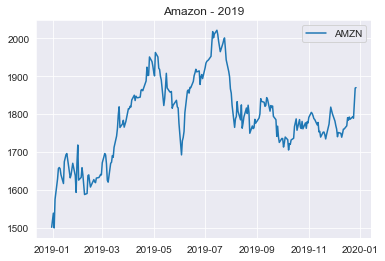

In [87]:
plt.title('Amazon - 2019')
plt.plot(prices_df.index,prices_df[tickers[0]], label = 'AMZN')
plt.legend()
plt.show()

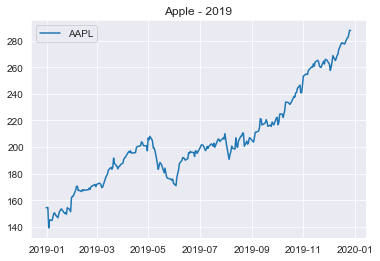

In [88]:
plt.title('Apple - 2019')
plt.plot(prices_df.index,prices_df[tickers[1]], label = 'AAPL')
plt.legend()
plt.show()

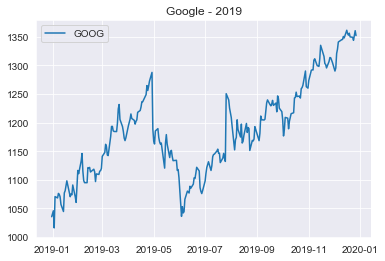

In [89]:
plt.title('Google - 2019')
plt.plot(prices_df.index,prices_df[tickers[2]], label = 'GOOG')
plt.legend()
plt.show()

In [90]:
print('==1==')
print('Q:מה אתם יכולים להגיד על התנהגות המניות?')
print('A:ניתן לראות כי במהלך 2019 שלושת המניות היו במגמת עליה, ומניית אפל אפילו הכפילה את השווי שלה ')

==1==
Q:מה אתם יכולים להגיד על התנהגות המניות?
A:ניתן לראות כי במהלך 2019 שלושת המניות היו במגמת עליה, ומניית אפל אפילו הכפילה את השווי שלה 


In [91]:
prices_list_train = []
for ticker in tickers:
    print(ticker)
    pricestrain = yf.download(ticker,part5start_date,part5end_date)['Adj Close']
    pricestrain = pd.DataFrame(pricestrain)
    prices_list_train.append(pricestrain)
    prices_df_train = pd.concat(prices_list_train,axis=1)

AMZN
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed


In [92]:
prices_df_train.columns = tickers
prices_df_train

,AMZN,AAPL,GOOG
Date,,,
2019-04-30,1926.520020,197.187088,1188.479980
2019-05-01,1911.520020,206.866135,1168.079956
2019-05-02,1900.819946,205.519897,1162.609985
2019-05-03,1962.459961,208.074783,1185.400024
2019-05-06,1950.550049,204.861542,1189.390015
...,...,...,...
2020-02-04,2049.669922,316.665344,1447.069946
2020-02-05,2039.869995,319.247589,1448.229980
2020-02-06,2050.229980,322.981781,1476.229980


In [93]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [94]:
prices_list_test = []
for ticker in tickers:
    print(ticker)
    pricestest = yf.download(ticker,part5pred_sd,part5pred_ed)['Adj Close']
    pricestest = pd.DataFrame(pricestest)
    prices_list_test.append(pricestest)
    prices_df_test = pd.concat(prices_list_test,axis=1)
prices_df_test.columns = tickers
prices_df_test

AMZN
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
GOOG
[*********************100%***********************]  1 of 1 completed


,AMZN,AAPL,GOOG
Date,,,
2020-02-10,2133.909912,320.104767,1508.680054
2020-02-11,2150.800049,318.173462,1508.790039
2020-02-12,2160.000000,325.729401,1518.270020
2020-02-13,2149.870117,323.409851,1514.660034
2020-02-14,2134.870117,323.489502,1520.739990
...,...,...,...
2020-05-21,2446.739990,316.279755,1402.800049
2020-05-22,2436.879883,318.316101,1410.420044
2020-05-26,2421.860107,316.159973,1417.020020


In [95]:
ARIMAp=4
ARIMAd=1
ARIMAq=0

# AMZN

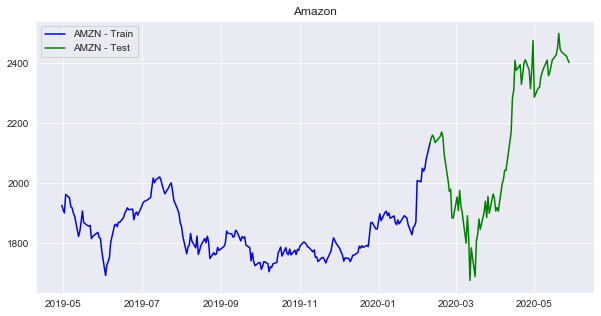

In [96]:
plt.figure(figsize=(10,5))
plt.title('Amazon')
plt.plot(prices_df_train.index,prices_df_train['AMZN'], label = 'AMZN - Train',c='b')
plt.plot(prices_df_test.index,prices_df_test['AMZN'], label = 'AMZN - Test',c='g')
plt.legend()
plt.show()

In [97]:
training_data = prices_df_train['AMZN'].values
test_data = prices_df_test['AMZN'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(ARIMAp,ARIMAd,ARIMAq))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    model_predictions.append(output[0])
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('AMZN Testing MSE:',MSE_error)

AMZN Testing MSE: 3615.4249915855617


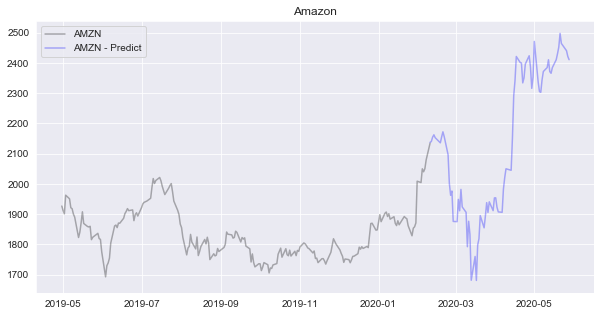

In [98]:
plt.figure(figsize=(10,5))
plt.title('Amazon')
plt.plot(prices_df_train.index,prices_df_train['AMZN'],color='black',alpha=0.3, label = 'AMZN ')
plt.plot(prices_df_test.index, model_predictions, color='blue',alpha=0.3, label = 'AMZN - Predict')
plt.legend()
plt.show()

# AAPL

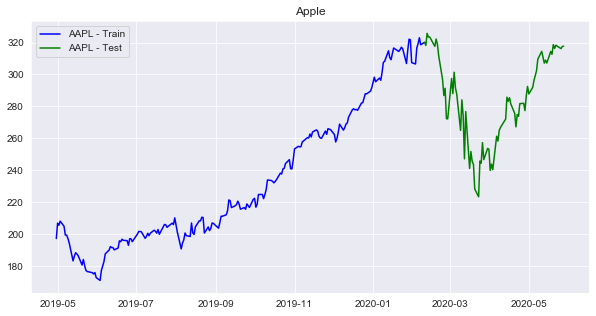

In [99]:
plt.figure(figsize=(10,5))
plt.title('Apple')
plt.plot(prices_df_train.index,prices_df_train['AAPL'], label = 'AAPL - Train',c='b')
plt.plot(prices_df_test.index,prices_df_test['AAPL'], label = 'AAPL - Test',c='g')
plt.legend()
plt.show()

In [100]:
training_data = prices_df_train['AAPL'].values
test_data = prices_df_test['AAPL'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(ARIMAp,ARIMAd,ARIMAq))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    model_predictions.append(output[0])
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('AAPL Testing MSE:',MSE_error)

AAPL Testing MSE: 117.97960255229141


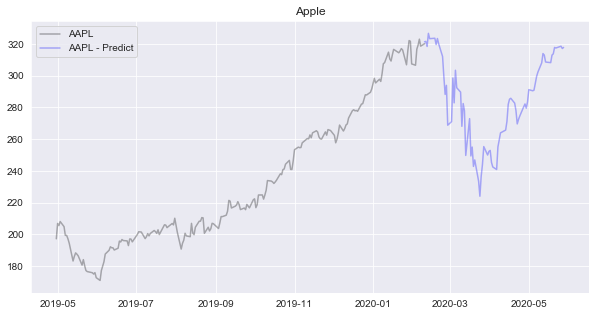

In [101]:
plt.figure(figsize=(10,5))
plt.title('Apple')
plt.plot(prices_df_train.index,prices_df_train['AAPL'],color='black',alpha=0.3, label = 'AAPL')
plt.plot(prices_df_test.index, model_predictions, color='blue',alpha=0.3, label = 'AAPL - Predict')
plt.legend()
plt.show()

## GOOG

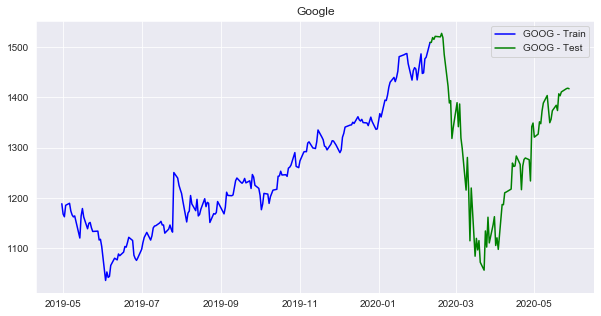

In [102]:
plt.figure(figsize=(10,5))
plt.title('Google')
plt.plot(prices_df_train.index,prices_df_train['GOOG'], label = 'GOOG - Train',c='b')
plt.plot(prices_df_test.index,prices_df_test['GOOG'], label = 'GOOG - Test',c='g')
plt.legend()
plt.show()

In [103]:
training_data = prices_df_train['GOOG'].values
test_data = prices_df_test['GOOG'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(ARIMAp,ARIMAd,ARIMAq))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    model_predictions.append(output[0])
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('GOOG Testing MSE:',MSE_error)

GOOG Testing MSE: 1765.9058531310814


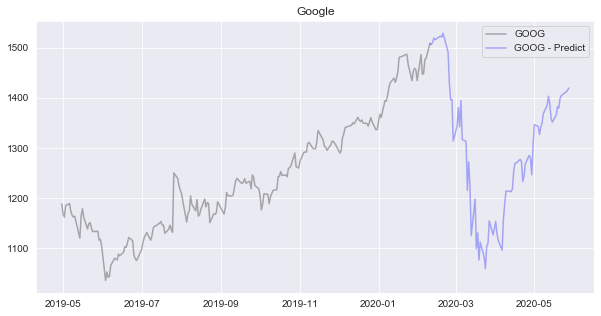

In [104]:
plt.figure(figsize=(10,5))
plt.title('Google')
plt.plot(prices_df_train.index,prices_df_train['GOOG'],color='black',alpha=0.3, label = 'GOOG')
plt.plot(prices_df_test.index, model_predictions, color='blue',alpha=0.3, label = 'GOOG - Predict')
plt.legend()
plt.show()

In [105]:
#ANSWERS

In [106]:
print('==1==')
print('Q: האם המודל שלכם היה מדויק?')
print('A: המודל היה די מדויק, מאוד קרוב למציאות')
print('==2==')
print('Q: מה המשמעות של MSE?')
print('A: זוהי הטעות הריבועית הממוצעת, כלומר ממוצע ריבועי הטעויות - במקרה שלנו ההבדל בין המחיר האמיתי למחיר שהמודל חזה')
print('==3==')
print('Q: מהם ערכי P D Q ואיך קבעתם מה הערכים הכי טובים עבור המודל שלכם')
print('A: אלו ערכים לפיהם המודל לוקח מספר תצפיות, מידת ההבדל וגודל הממוצע הנע\nאת הערכים קבענו לפי')
print('==4==')
print('Q: האם לדעתכם המניות שסווגו לפני המשבר כדומות יסווגו דומות גם אחריו?')
print('A: לדעתנו כן, רוב המניות שסווגו דומות ישארו בסיווג זהה')

==1==
Q: האם המודל שלכם היה מדויק?
A: המודל היה די מדויק, מאוד קרוב למציאות
==2==
Q: מה המשמעות של MSE?
A: זוהי הטעות הריבועית הממוצעת, כלומר ממוצע ריבועי הטעויות - במקרה שלנו ההבדל בין המחיר האמיתי למחיר שהמודל חזה
==3==
Q: מהם ערכי P D Q ואיך קבעתם מה הערכים הכי טובים עבור המודל שלכם
A: אלו ערכים לפיהם המודל לוקח מספר תצפיות, מידת ההבדל וגודל הממוצע הנע
את הערכים קבענו לפי
==4==
Q: האם לדעתכם המניות שסווגו לפני המשבר כדומות יסווגו דומות גם אחריו?
A: לדעתנו כן, רוב המניות שסווגו דומות ישארו בסיווג זהה
